In [458]:
import pandas as pd
import matplotlib.pyplot as plt

In [459]:
# Dataset Source: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data

df=pd.read_csv("Salary_Data.csv")
(df.isna().sum()/len(df))*100 
# every column has some NA values; maj of them being in Salary column; 
# yet all are less than 0.1% of the size of the column

Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.074582
dtype: float64

In [460]:
df=df.dropna() 
# NA values will be dropped since missing data is a minute part of the dataset

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [461]:
cat=[c for c in df.columns if df[c].dtype=='object'] 
# checks the columns that have object dtype (and are hence likely to be categorical)
for col in cat:
    print(col,sorted(df[col].unique()))
    print()

Gender ['Female', 'Male', 'Other']

Education Level ["Bachelor's", "Bachelor's Degree", 'High School', "Master's", "Master's Degree", 'PhD', 'phD']

Job Title ['Account Manager', 'Accountant', 'Administrative Assistant', 'Back end Developer', 'Business Analyst', 'Business Development Manager', 'Business Intelligence Analyst', 'CEO', 'Chief Data Officer', 'Chief Technology Officer', 'Content Marketing Manager', 'Copywriter', 'Creative Director', 'Customer Service Manager', 'Customer Service Rep', 'Customer Service Representative', 'Customer Success Manager', 'Customer Success Rep', 'Data Analyst', 'Data Entry Clerk', 'Data Scientist', 'Delivery Driver', 'Digital Content Producer', 'Digital Marketing Manager', 'Digital Marketing Specialist', 'Director', 'Director of Business Development', 'Director of Data Science', 'Director of Engineering', 'Director of Finance', 'Director of HR', 'Director of Human Capital', 'Director of Human Resources', 'Director of Marketing', 'Director of Operatio

In [462]:
# ok, looks like some Data in the cols are referring to the same thing but are represented differently;
# E.g. Bachelor's & Bachelor's Degree in Education level 
# / 'Customer Service Rep' vs 'Customer Service Representative' for Job Title

ed_replacements=[("Bachelor's Degree","Bachelor's"),("Master's Degree","Master's"),('phD','PhD')]

job_replacements=[('Customer Service Representative','Customer Service Rep'),('Director of Human Resources','Director of HR'),
                  ('Front end Developer','Front End Developer'),('Human Resources Manager','HR Manager'),
                  ('Juniour HR Coordinator','Junior HR Coordinator'),('Juniour HR Generalist','Junior HR Generalist'),
                  ('Senior Human Resources Manager','Senior HR Manager'),('Senior Human Resources Specialist','Senior HR Specialist'),
                  ('Social Media Man','Social Media Manager'),]

# each list contains tuples, with each tuple having 2 strings, 
# 1st one is the title to be replaced, 2nd one is what wil replace the title

# create a function to automate this process:

def replace_str(list_o_tuples,col_of_df):
    for tup in list_o_tuples:
        to_replace=tup[0]
        replace_wi=tup[1]
        df[col_of_df]=df[col_of_df].replace(to_replace,replace_wi) 
    return df[col_of_df]   

print(replace_str(ed_replacements,'Education Level').unique())
print(sorted(replace_str(job_replacements,'Job Title').unique())) 
# replacements have been made

["Bachelor's" "Master's" 'PhD' 'High School']
['Account Manager', 'Accountant', 'Administrative Assistant', 'Back end Developer', 'Business Analyst', 'Business Development Manager', 'Business Intelligence Analyst', 'CEO', 'Chief Data Officer', 'Chief Technology Officer', 'Content Marketing Manager', 'Copywriter', 'Creative Director', 'Customer Service Manager', 'Customer Service Rep', 'Customer Success Manager', 'Customer Success Rep', 'Data Analyst', 'Data Entry Clerk', 'Data Scientist', 'Delivery Driver', 'Digital Content Producer', 'Digital Marketing Manager', 'Digital Marketing Specialist', 'Director', 'Director of Business Development', 'Director of Data Science', 'Director of Engineering', 'Director of Finance', 'Director of HR', 'Director of Human Capital', 'Director of Marketing', 'Director of Operations', 'Director of Product Management', 'Director of Sales', 'Director of Sales and Marketing', 'Event Coordinator', 'Financial Advisor', 'Financial Analyst', 'Financial Manager', 

In [463]:
# Hypothesis would be older ppl, with higher education & longer years of xp 
# (coupled with gender of person) would have a higher salary

# first observe corr btw numeric factors

num=[c for c in df.columns if df[c].dtype!='object']
df[num].corr() 
# unsurprisingly, age is strongly correlated with years of xp; 
# since that has higher corr w salary, will be used as judgement of salary
# will be impt to note for naive bayes model; 
# since the features should, naively, have no corr w each other

,Age,Years of Experience,Salary
Age,1.000000,0.937725,0.728061
Years of Experience,0.937725,1.000000,0.808968
Salary,0.728061,0.808968,1.000000


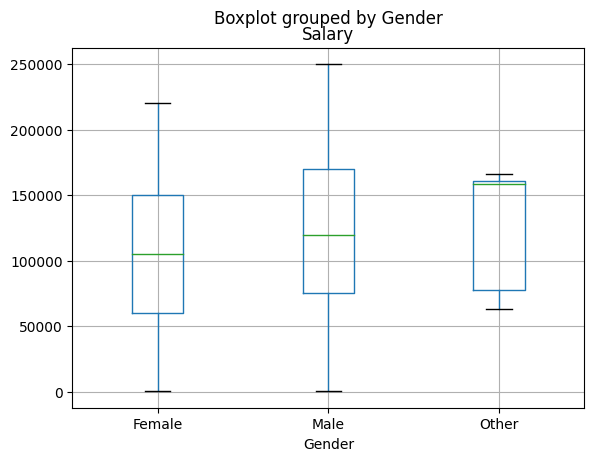

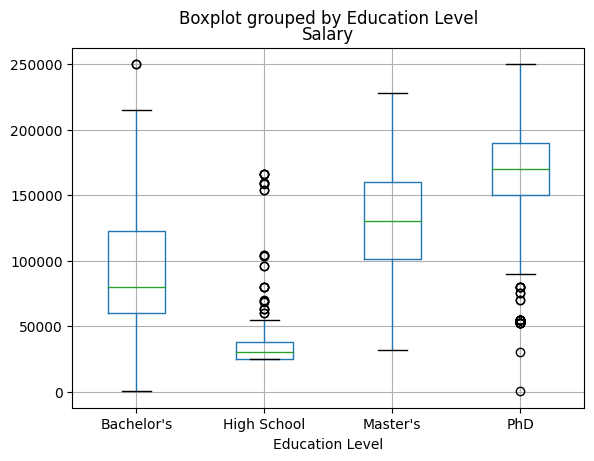

In [464]:
for c in (cat[:2]):# columns apart from job title
    df.boxplot(column=['Salary'],by=c)

# appears that hypothesis was true; males earn> than females; 
# other has diff boxplot likely due to smaller number of cases
# higher the education level, the more the person is likely to earn 
# (though outliers are certainly present)

In [465]:
# Analysis on prediction capabilities using
# Regression approach ; Random Forest and Naive Bayes
import random 
state=random.choice(range(1,9999)) 
# to standardise the random state across all models for train test split

In [466]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(df[['Years of Experience']],df['Salary'],test_size=0.2,random_state=state)
model=LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
y_pred=model.predict(X_test)

0.653555198659583


30436.432890385797


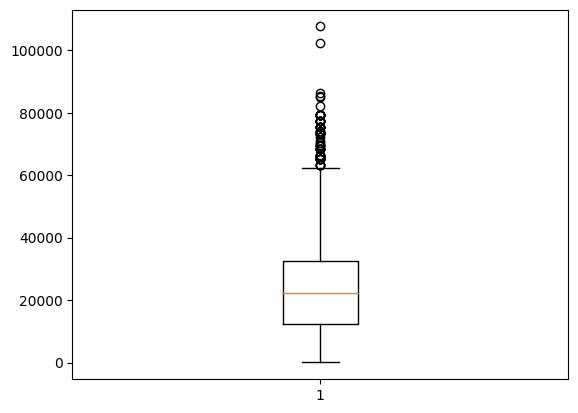

In [467]:
plt.boxplot(abs(y_test.values-y_pred)) 
# salary is likely to be btw 10-30k off from reality 
# (in either positive/negative direction)
# not greaaaat
print((sum((y_test.values-y_pred)**2)/len(y_test))**0.5) # very high rmse, not a great model

In [468]:
sum(abs(y_test.values-y_pred))/len(y_pred) # MAE

24685.156015876706

In [469]:
yf=pd.DataFrame(columns=['Actual','Predicted'])
for i in range(0,len(y_test)):
    yf.loc[i]=[y_test.values[i],y_pred[i]]

yf['Percentage diff']=((yf['Predicted']-yf['Actual'])/yf['Actual']*100)
abs(yf['Percentage diff']).quantile((0.25,0.75)) # IQR indicates that pred values are likely to be 10-30% off of actual values 
# (either lower/higher) > this only looks at abs percentage diff 

0.25    10.461641
0.75    35.357680
Name: Percentage diff, dtype: float64

In [470]:
# mapping categorical variables to values
def inordinate_map(col_o_dataframe): # maps w/o any regard for rank (treats data as nominal)
    un=df[col_o_dataframe].unique()
    dic={k:v for v,k in enumerate(un)}
    return df[col_o_dataframe].map(dic)

df['Education Level']=df['Education Level'].map({'High School':0,"Bachelor's":1,"Master's":2,'PhD':3})
df['Gender']=inordinate_map('Gender')
df['Job Title']=inordinate_map('Job Title')
df.head() # all nums!

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,1,0,5.0,90000.0
1,28.0,1,2,1,3.0,65000.0
2,45.0,0,3,2,15.0,150000.0
3,36.0,1,1,3,7.0,60000.0
4,52.0,0,2,4,20.0,200000.0


In [471]:
from sklearn.naive_bayes import GaussianNB

X_train,X_test,y_train,y_test=train_test_split(df[df.columns.drop(['Salary','Age'])],df['Salary'],test_size=0.2,random_state=state)
model=GaussianNB()
model.fit(X_train,y_train)
print(model.score(X_train,y_train)) 
# reallly not great; at all when it comes to regression
y_pred=model.predict(X_test)

0.22788353863381858


32282.344295226183


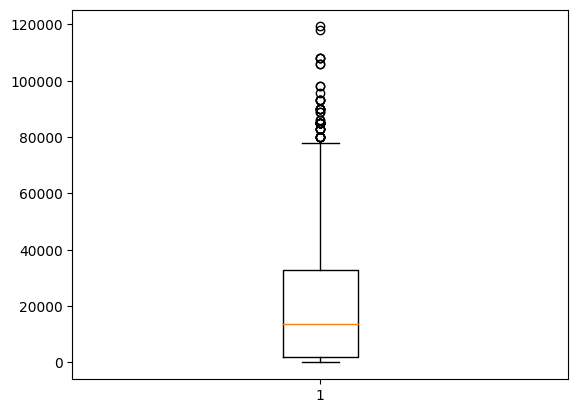

In [472]:
# unsurpsing when feasibility of naive bayes model for regression is reasearched on
'''Relation to logistic regression: naive Bayes classifier can be considered a way of fitting a probability model 
that optimizes the joint likelihood p(C , x), while logistic regression fits the same probability model 
to optimize the conditional p(C | x).''' 
# ie for regression, Naive Bayes model performs similarly to logistic regression model
# And in this case, NOT great

plt.boxplot(abs(y_test.values-y_pred))
print((sum((y_test.values-y_pred)**2)/len(y_test))**0.5) 

In [473]:
sum(abs(y_test.values-y_pred))/len(y_pred) # MAE

21745.211940298508

In [474]:
yf=pd.DataFrame(columns=['Actual','Predicted'])
for i in range(0,len(y_test)):
    yf.loc[i]=[y_test.values[i],y_pred[i]]

yf['Percentage diff']=((yf['Predicted']-yf['Actual'])/yf['Actual']*100)
abs(yf['Percentage diff']).quantile((0.25,0.75)) 
# admittedly, there is an inprovement in how much closer predicted values are 
# to actual values, tho since upper IQR is still close to 30%, not a huge improvement

0.25     3.560606
0.75    30.666667
Name: Percentage diff, dtype: float64

In [475]:
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test=train_test_split(df[df.columns.drop(['Salary'])],df['Salary'],test_size=0.2,random_state=state)
model=RandomForestRegressor(n_estimators=200)
model.fit(X_train,y_train)
y_base=model.predict(X_train)
print(model.score(X_train,y_train)) # ooooo, very nice score
y_pred=model.predict(X_test)

0.9904137024435835


8315.345212531629


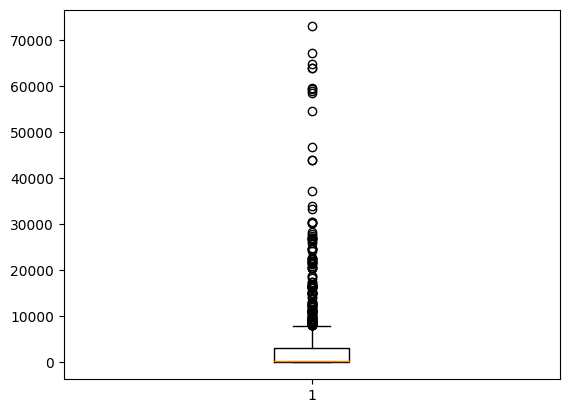

In [476]:
plt.boxplot(abs(y_test.values-y_pred))
print((sum((y_test.values-y_pred)**2)/len(y_test))**0.5) # MUCH lower RMSE, though outliers are still fairly present

In [477]:
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test,y_pred) # low MAE (wrt salary ranges)

3286.3582882297724

In [478]:
df['Salary'].quantile((.25,.75)) 
# IQR for salary is from 70k-160k; 3k diff is acceptable, esp when compared to 
# MAEs of the models above being above 20k-ish

0.25     70000.0
0.75    160000.0
Name: Salary, dtype: float64

0.25    0.00000
0.75    2.98001
Name: Percentage diff, dtype: float64

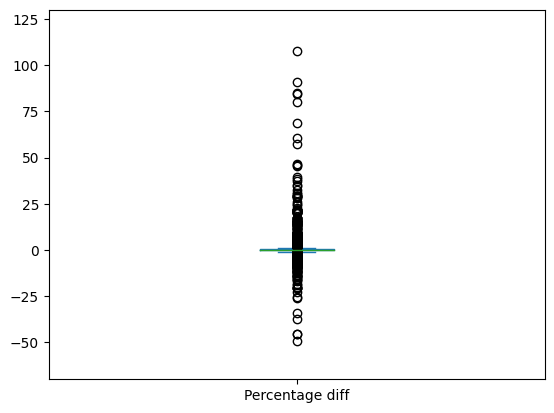

In [479]:
yf=pd.DataFrame(columns=['Actual','Predicted'])
for i in range(0,len(y_test)):
    yf.loc[i]=[y_test.values[i],y_pred[i]]

yf['Percentage diff']=((yf['Predicted']-yf['Actual'])/yf['Actual']*100)
yf['Percentage diff'].plot(kind='box')
plt.ylim(bottom=-70,top=130)
abs(yf['Percentage diff']).quantile((.25,.75)) 
# MUUUUUCH better, most pred values being approx 3% off of actual salary values

In [481]:
within_5=len(abs(yf['Percentage diff'])[abs(yf['Percentage diff'])<=5])/len(yf['Percentage diff'])*100
within_1=len(abs(yf['Percentage diff'])[abs(yf['Percentage diff'])<=1])/len(yf['Percentage diff'])*100
print(f'Based on the model;\n{within_5:.2f}% of predicted values are +/- 5% of the actual salary, and\n'\
      +f'{within_1:.2f}% of predicted values are +/- 1% of the actual salary')

Based on the model;
81.42% of predicted values are +/- 5% of the actual salary, and
62.09% of predicted values are +/- 1% of the actual salary
